In [2]:
# Perceptron Simples - Classificação Binária
#
# Este código implementa um Perceptron Simples para classificação binária usando aprendizado supervisionado.
# O Perceptron ajusta seus pesos com base no erro das previsões, aplicando uma regra de atualização linear.
#
# Dependências Necessárias:
# - NumPy
# - Pandas
# - Matplotlib
#
# Estrutura do Código:
# - Função train_perceptron: Treina o Perceptron usando a regra de atualização dos pesos.
# - Função test_perceptron: Avalia a acurácia do Perceptron nos dados de teste.
# - Carregamento dos dados de treino e teste a partir de arquivos CSV.
# - Execução do treinamento e avaliação do modelo.
# - Visualização dos erros e da fronteira de decisão.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Número de épocas executadas: 100
Acurácia no treino: 97.86%
Acurácia no teste: 95.00%


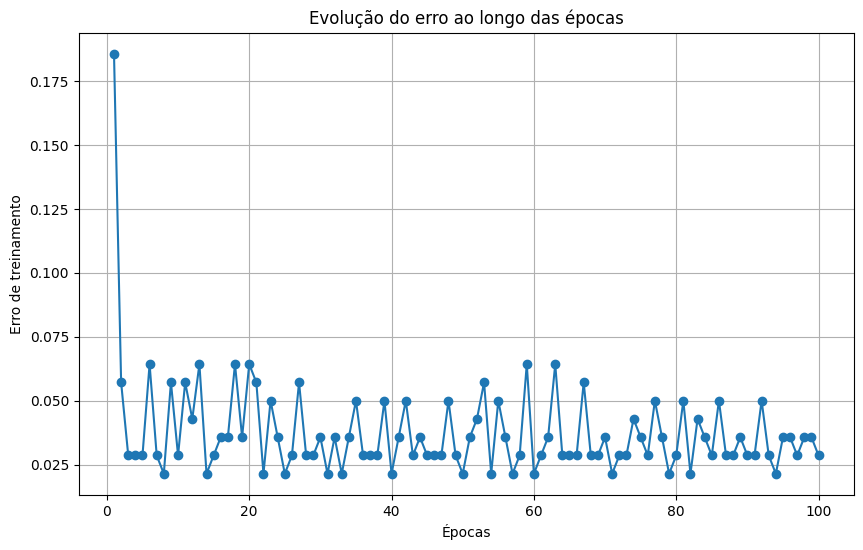

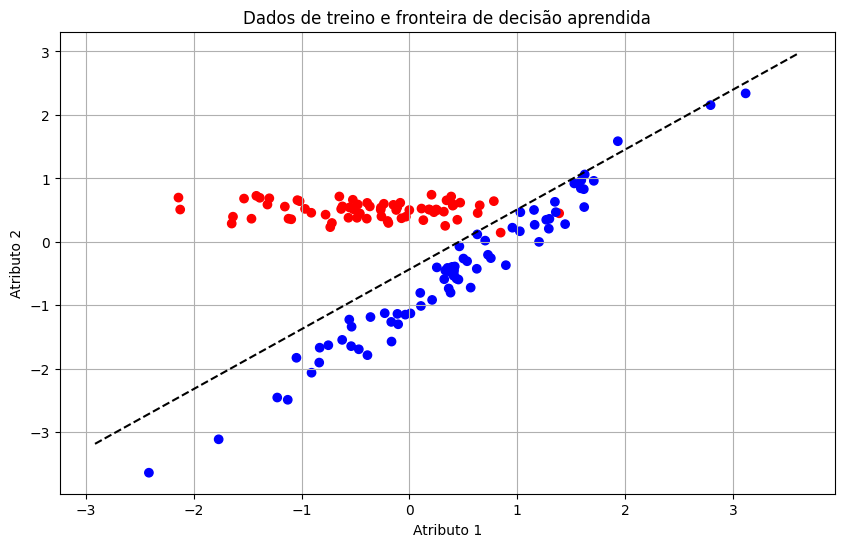

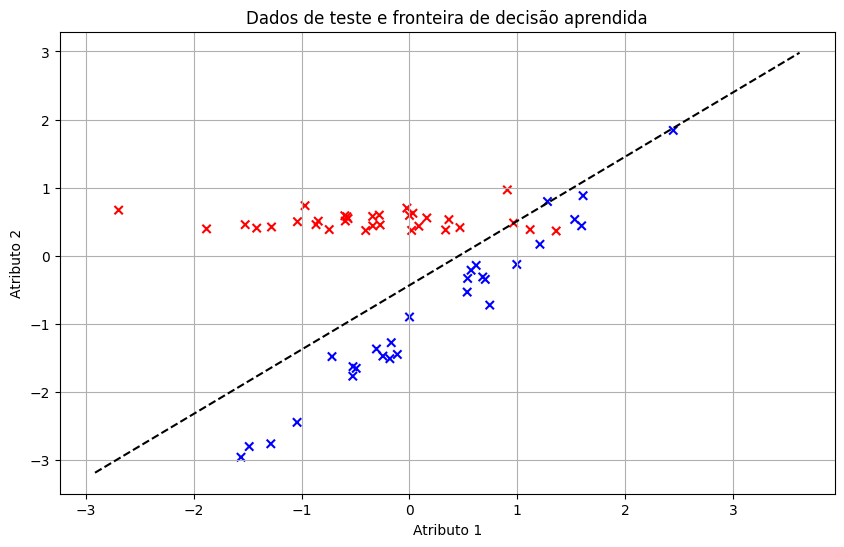

In [3]:
# Treinamento do Perceptron
#
# Parâmetros:
# - X: Dados de entrada (atributos)
# - y: Rótulos de classe (1 ou -1)
# - learning_rate: Taxa de aprendizado (padrão: 0.1)
# - epochs: Número máximo de épocas (padrão: 100)
# - seed: Semente para reprodutibilidade (opcional)
#
# Retorna:
# - weights: Vetor de pesos ajustados
# - epoch + 1: Número de épocas executadas
# - errors: Lista de erros por época

def train_perceptron(X, y, learning_rate=0.1, epochs=100, seed=None):
    if seed:
        np.random.seed(seed)

    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])
    weights = np.random.randn(n_features + 1)

    errors = []

    for epoch in range(epochs):
        error_count = 0
        for i in range(n_samples):
            x_i = X[:, i]
            y_i = y[0, i]
            y_pred = np.where(np.dot(weights, x_i) >= 0, 1, -1)
            if y_pred != y_i:
                error_count += 1
                weights += learning_rate * (y_i - y_pred) * x_i
        errors.append(error_count / n_samples)
        if error_count == 0:
            break
    return weights, epoch + 1, errors

# Avaliação do Perceptron
#
# Parâmetros:
# - X: Dados de entrada (atributos)
# - y: Rótulos de classe (1 ou -1)
# - weights: Vetor de pesos ajustados pelo treinamento
#
# Retorna:
# - accuracy: Acurácia da previsão

def test_perceptron(X, y, weights):
    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])

    predictions = np.where(np.dot(weights, X) >= 0, 1, -1)
    accuracy = np.mean(predictions == y)

    return accuracy

# Carregamento dos Dados
train_data = pd.read_csv('train_dataset1.csv')
test_data = pd.read_csv('test_dataset1.csv')

X_train = train_data.drop('label', axis=1).values.T
y_train = train_data['label'].values.reshape(1, -1)

X_test = test_data.drop('label', axis=1).values.T
y_test = test_data['label'].values.reshape(1, -1)

# Treinamento e Avaliação
weights, epochs_ran, errors = train_perceptron(X_train, y_train, learning_rate=0.1, epochs=100)

train_accuracy = test_perceptron(X_train, y_train, weights)
test_accuracy = test_perceptron(X_test, y_test, weights)

print(f'Número de épocas executadas: {epochs_ran}')
print(f'Acurácia no treino: {train_accuracy * 100:.2f}%')
print(f'Acurácia no teste: {test_accuracy * 100:.2f}%')

# Visualização de Erros
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('Evolução do erro ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Erro de treinamento')
plt.grid(True)
plt.show()

# Visualização da Fronteira de Decisão - Dados de Treino
plt.figure(figsize=(10, 6))
plt.scatter(X_train[0, :], X_train[1, :], c=y_train[0], cmap='bwr', marker='o')
x_min, x_max = X_train[0, :].min() - 0.5, X_train[0, :].max() + 0.5
y_min = -(weights[0] + weights[1] * x_min) / weights[2]
y_max = -(weights[0] + weights[1] * x_max) / weights[2]
plt.plot([x_min, x_max], [y_min, y_max], 'k--')
plt.title('Dados de treino e fronteira de decisão aprendida')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid(True)
plt.show()

# Visualização da Fronteira de Decisão - Dados de Teste
plt.figure(figsize=(10, 6))
plt.scatter(X_test[0, :], X_test[1, :], c=y_test[0], cmap='bwr', marker='x')
plt.plot([x_min, x_max], [y_min, y_max], 'k--')
plt.title('Dados de teste e fronteira de decisão aprendida')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid(True)
plt.show()

Número de épocas executadas: 100
Acurácia no treino: 66.29%
Acurácia no teste: 68.00%


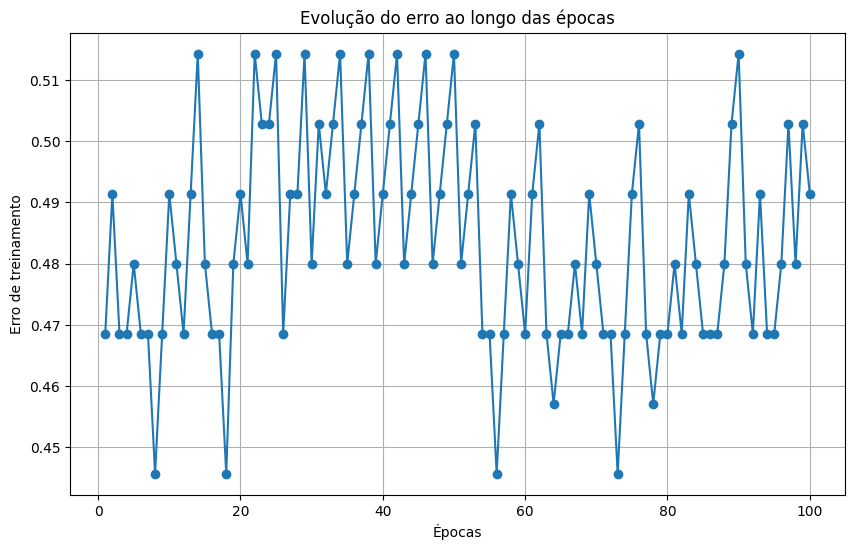

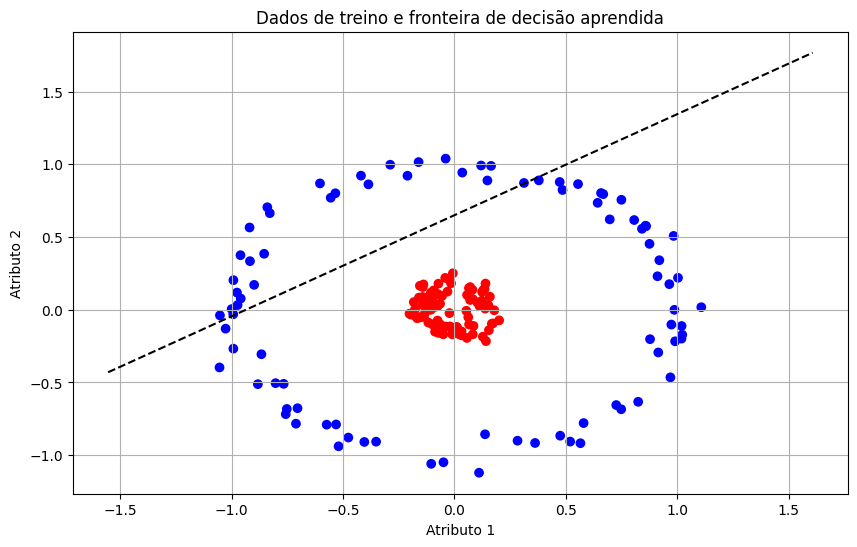

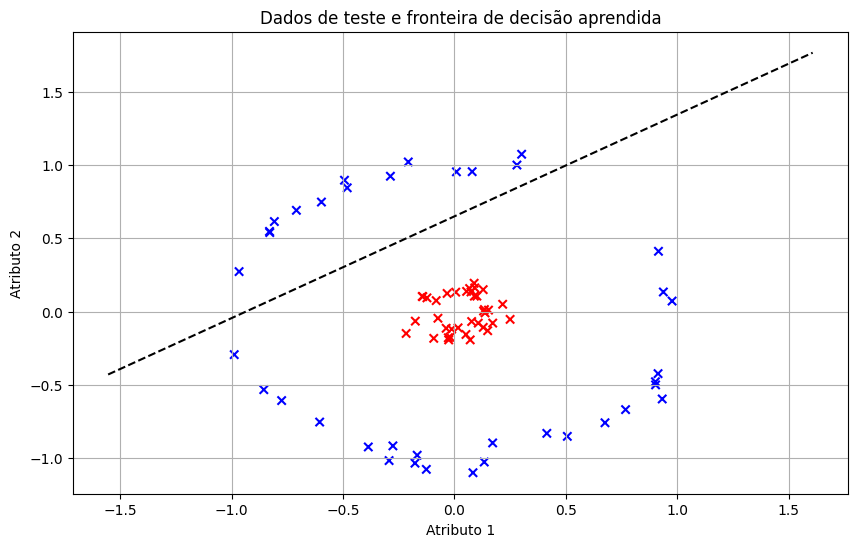

In [4]:
# Função para treinar um perceptron utilizando aprendizado supervisionado
def train_perceptron(X, y, learning_rate=0.1, epochs=100, seed=None):
    """
    Treina um modelo de Perceptron com o conjunto de dados fornecido.

    Parâmetros:
        X (numpy.ndarray): Matriz de atributos com dimensão (n_features, n_samples).
        y (numpy.ndarray): Vetor de rótulos com dimensão (1, n_samples).
        learning_rate (float): Taxa de aprendizado para atualização dos pesos.
        epochs (int): Número máximo de épocas de treinamento.
        seed (int, opcional): Valor para fixar a semente aleatória (reprodutibilidade).

    Retorna:
        weights (numpy.ndarray): Vetor de pesos treinado.
        epoch + 1 (int): Número de épocas executadas.
        errors (list): Lista com a taxa de erro em cada época.
    """
    if seed:
        np.random.seed(seed)

    # Inicializa os pesos com valores aleatórios e adiciona o bias à matriz X
    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])  # Adiciona o termo de bias (1s)
    weights = np.random.randn(n_features + 1)  # Inicialização dos pesos aleatórios

    errors = []  # Lista para armazenar a taxa de erro por época

    # Loop de treinamento por época
    for epoch in range(epochs):
        error_count = 0  # Contador de erros por época

        # Treinamento iterando sobre as amostras
        for i in range(n_samples):
            x_i = X[:, i]  # Amostra de entrada
            y_i = y[0, i]  # Rótulo da amostra

            # Predição com base no produto interno dos pesos e entrada
            y_pred = np.where(np.dot(weights, x_i) >= 0, 1, -1)

            # Atualização dos pesos se houver erro
            if y_pred != y_i:
                error_count += 1
                weights += learning_rate * (y_i - y_pred) * x_i

        # Armazenando a taxa de erro da época atual
        errors.append(error_count / n_samples)

        # Interrompe o treinamento se não houver mais erros
        if error_count == 0:
            break

    return weights, epoch + 1, errors

# Função para testar o modelo Perceptron treinado
def test_perceptron(X, y, weights):
    """
    Testa o modelo de Perceptron com dados fornecidos.

    Parâmetros:
        X (numpy.ndarray): Matriz de atributos com dimensão (n_features, n_samples).
        y (numpy.ndarray): Vetor de rótulos com dimensão (1, n_samples).
        weights (numpy.ndarray): Vetor de pesos treinado.

    Retorna:
        accuracy (float): Taxa de acerto do modelo no conjunto de teste.
    """
    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])  # Adiciona o termo de bias
    predictions = np.where(np.dot(weights, X) >= 0, 1, -1)
    accuracy = np.mean(predictions == y)  # Calcula a acurácia

    return accuracy

# Carregando os conjuntos de dados de treino e teste
train_data = pd.read_csv('train_dataset2.csv')
test_data = pd.read_csv('test_dataset2.csv')

# Preparando os dados para treino e teste
X_train = train_data.drop('label', axis=1).values.T
y_train = train_data['label'].values.reshape(1, -1)
X_test = test_data.drop('label', axis=1).values.T
y_test = test_data['label'].values.reshape(1, -1)

# Treinando o modelo Perceptron
weights, epochs_ran, errors = train_perceptron(X_train, y_train, learning_rate=0.1, epochs=100)

# Avaliação do modelo no conjunto de treino e teste
train_accuracy = test_perceptron(X_train, y_train, weights)
test_accuracy = test_perceptron(X_test, y_test, weights)

# Exibindo os resultados de desempenho
print(f'Número de épocas executadas: {epochs_ran}')
print(f'Acurácia no treino: {train_accuracy * 100:.2f}%')
print(f'Acurácia no teste: {test_accuracy * 100:.2f}%')

# Plotando a evolução da taxa de erro durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('Evolução do erro ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Erro de treinamento')
plt.grid(True)
plt.show()

# Plotando os dados de treino e a fronteira de decisão aprendida
plt.figure(figsize=(10, 6))
plt.scatter(X_train[0, :], X_train[1, :], c=y_train[0], cmap='bwr', marker='o')
x_min, x_max = X_train[0, :].min() - 0.5, X_train[0, :].max() + 0.5
y_min = -(weights[0] + weights[1] * x_min) / weights[2]
y_max = -(weights[0] + weights[1] * x_max) / weights[2]
plt.plot([x_min, x_max], [y_min, y_max], 'k--')
plt.title('Dados de treino e fronteira de decisão aprendida')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid(True)
plt.show()

# Plotando os dados de teste e a fronteira de decisão aprendida
plt.figure(figsize=(10, 6))
plt.scatter(X_test[0, :], X_test[1, :], c=y_test[0], cmap='bwr', marker='x')
plt.plot([x_min, x_max], [y_min, y_max], 'k--')
plt.title('Dados de teste e fronteira de decisão aprendida')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.grid(True)
plt.show()

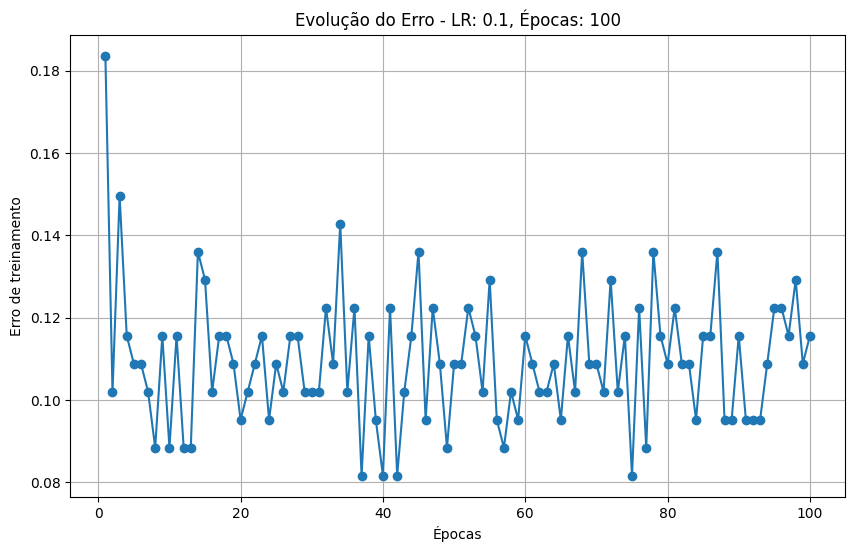

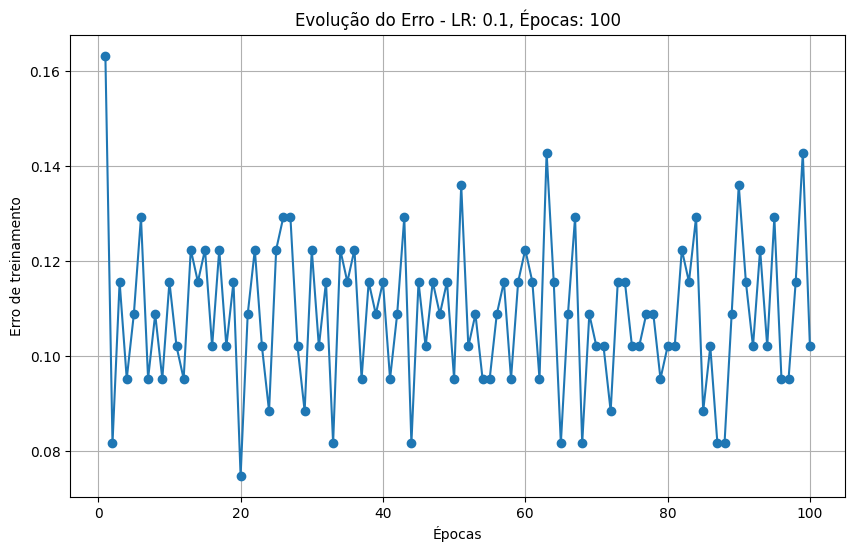

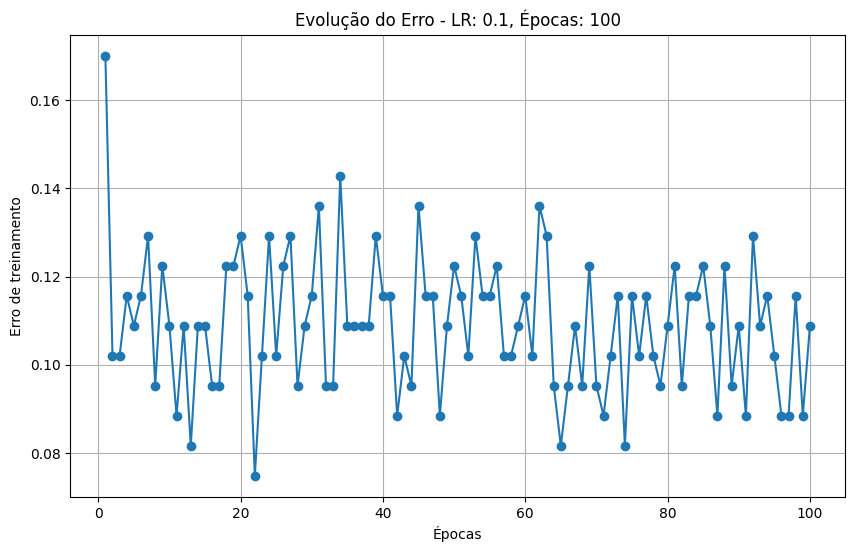

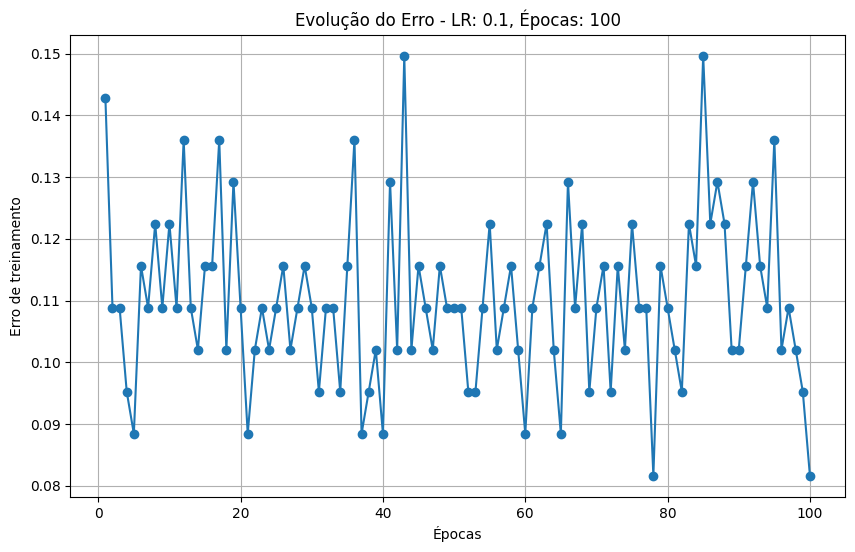

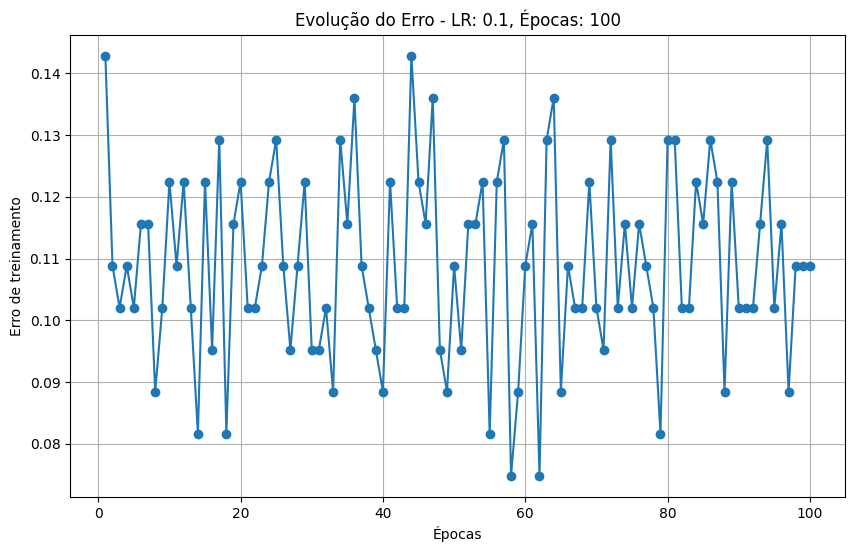

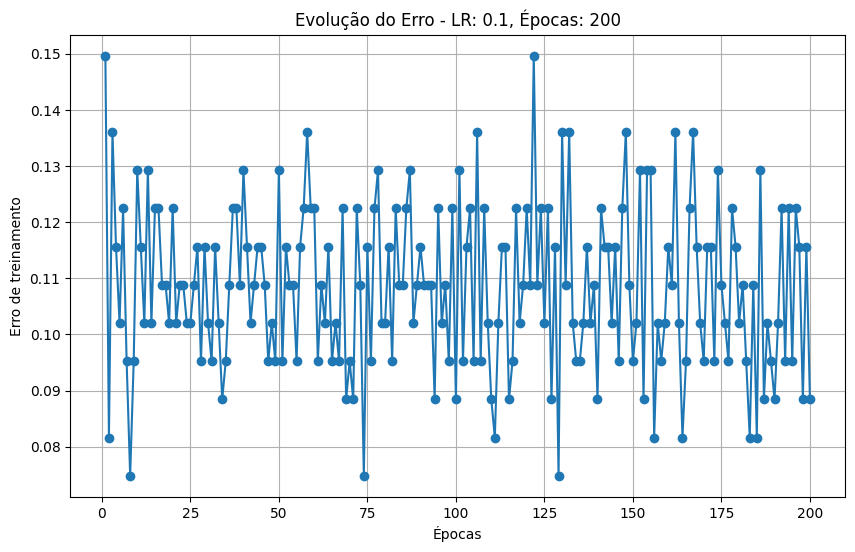

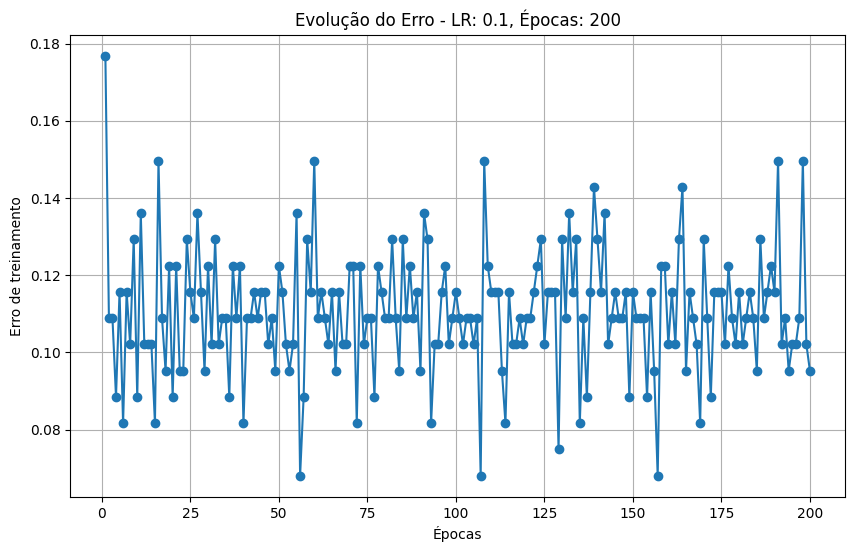

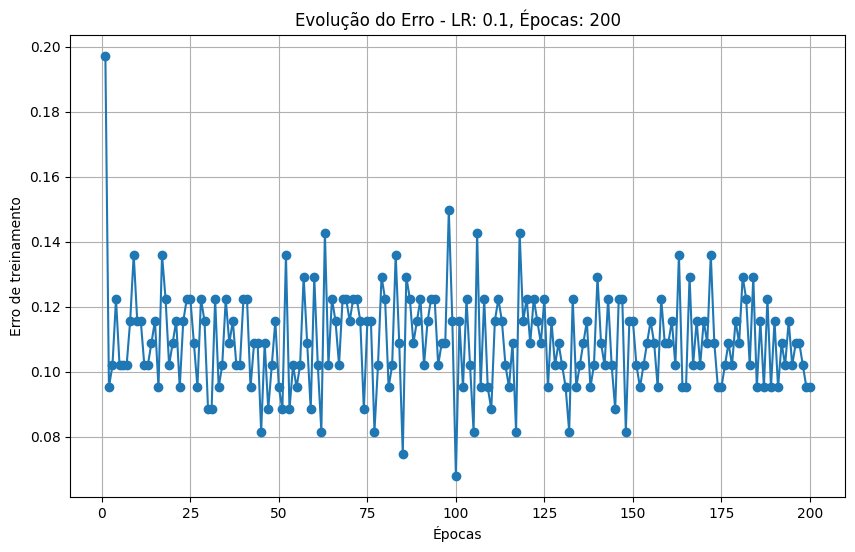

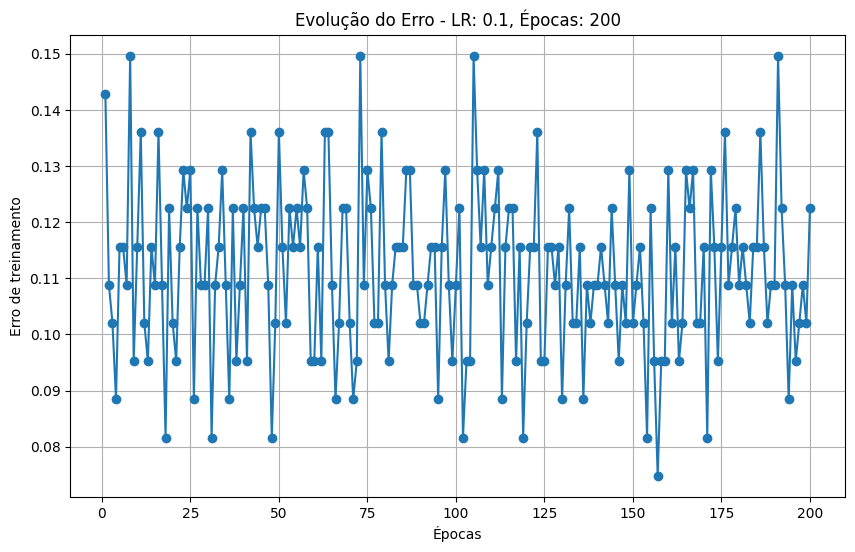

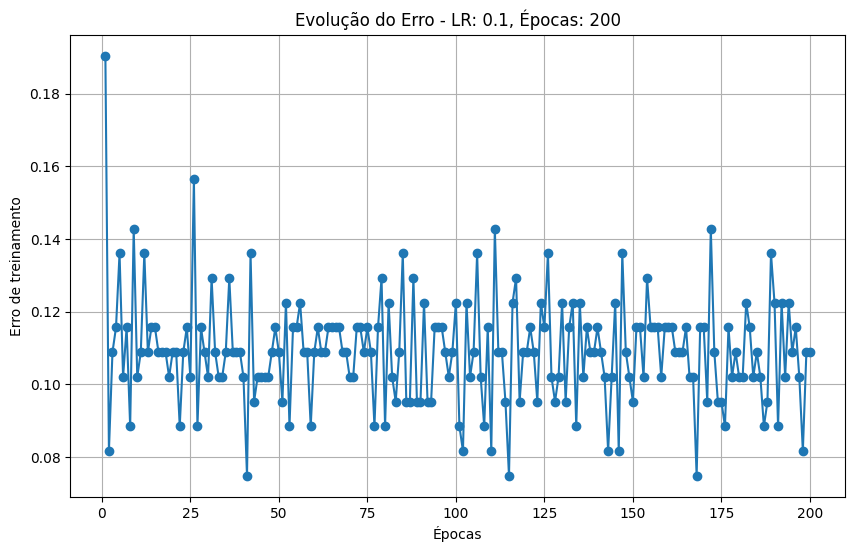

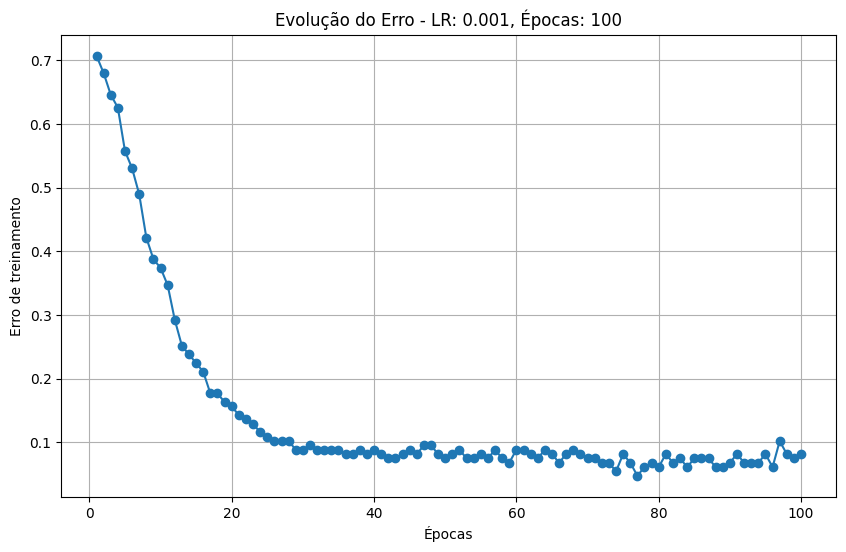

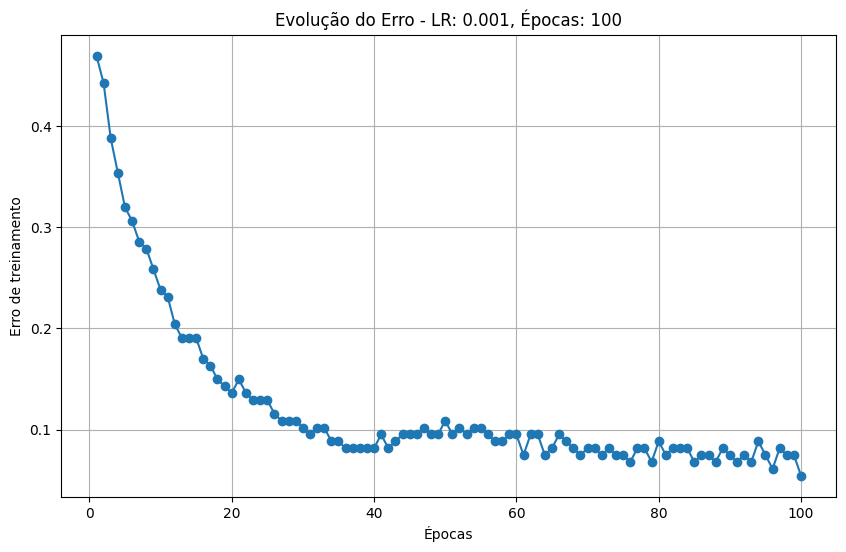

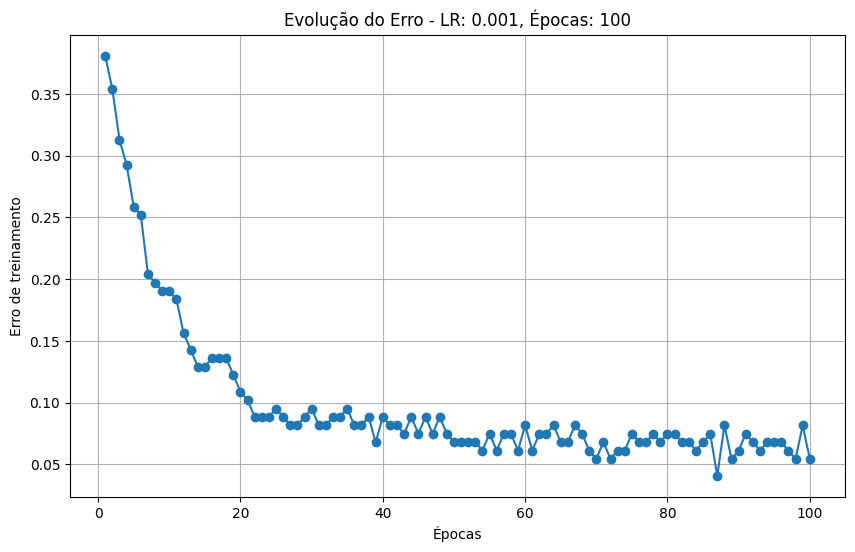

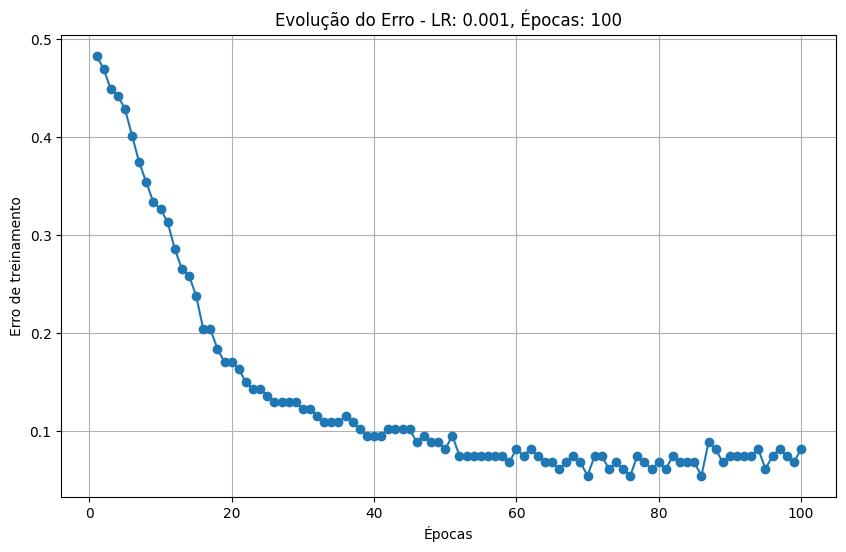

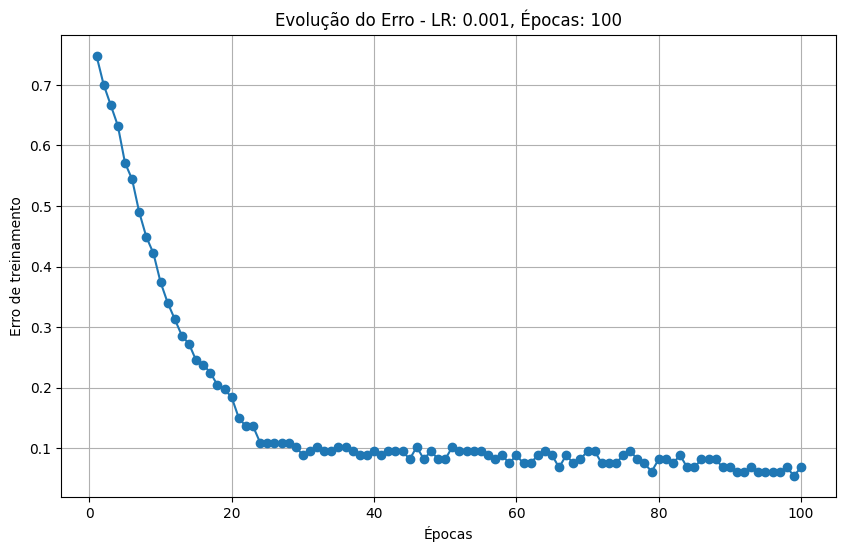

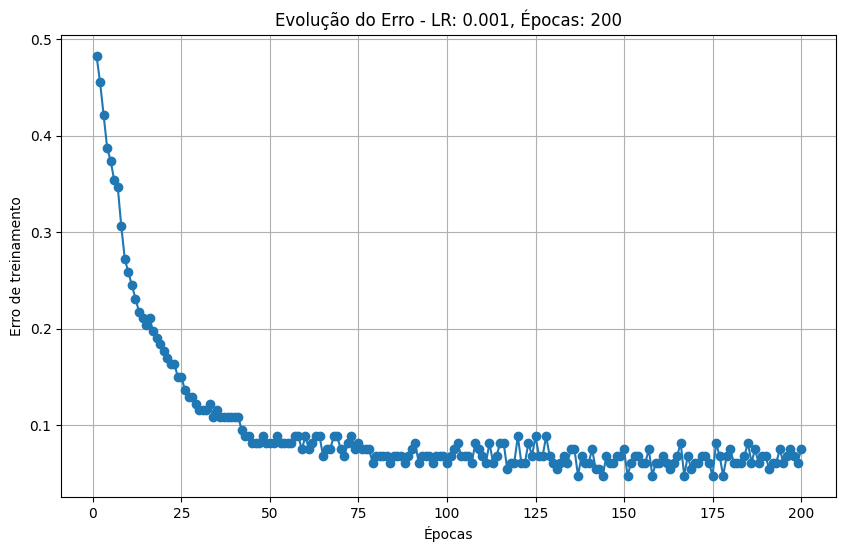

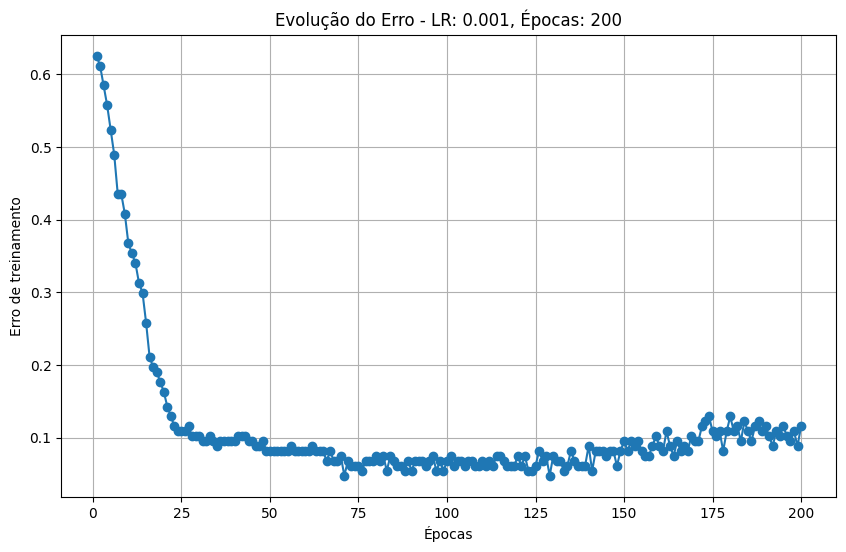

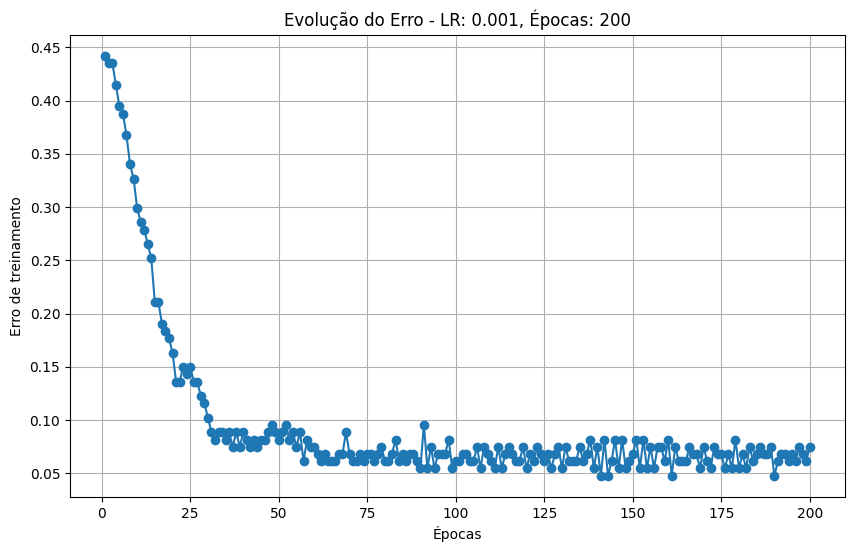

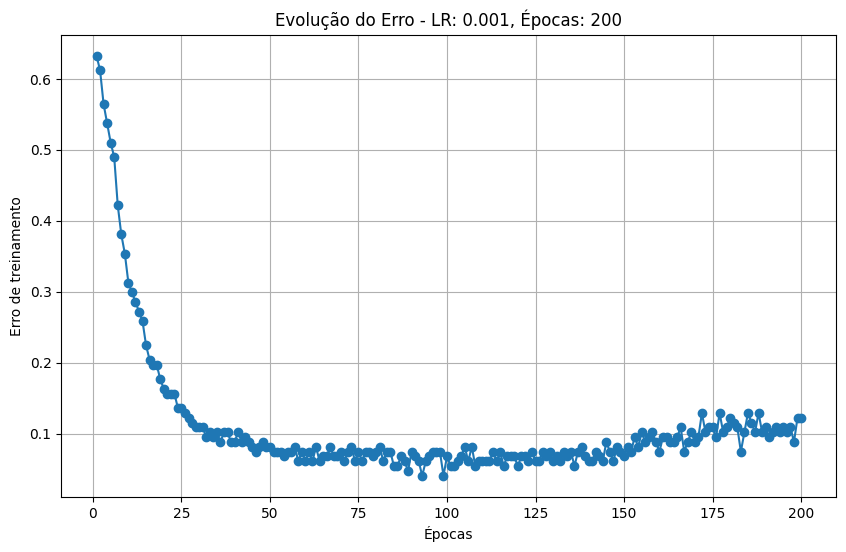

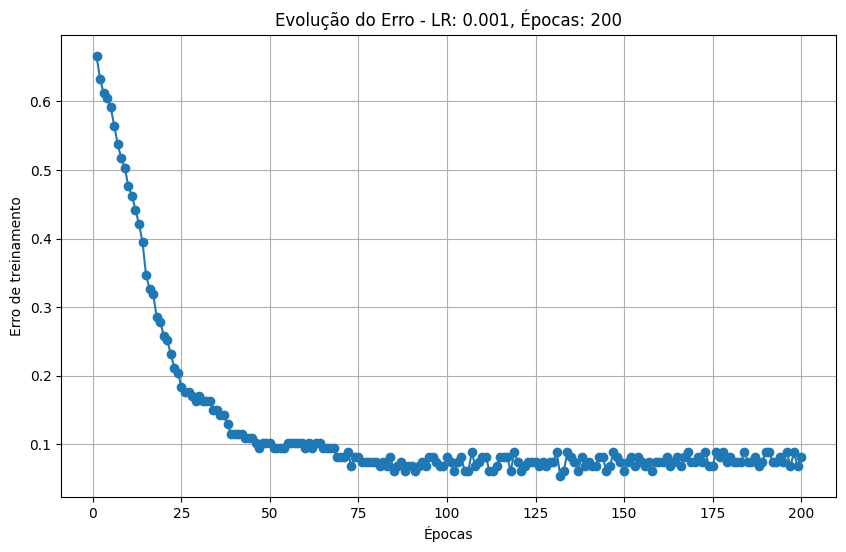

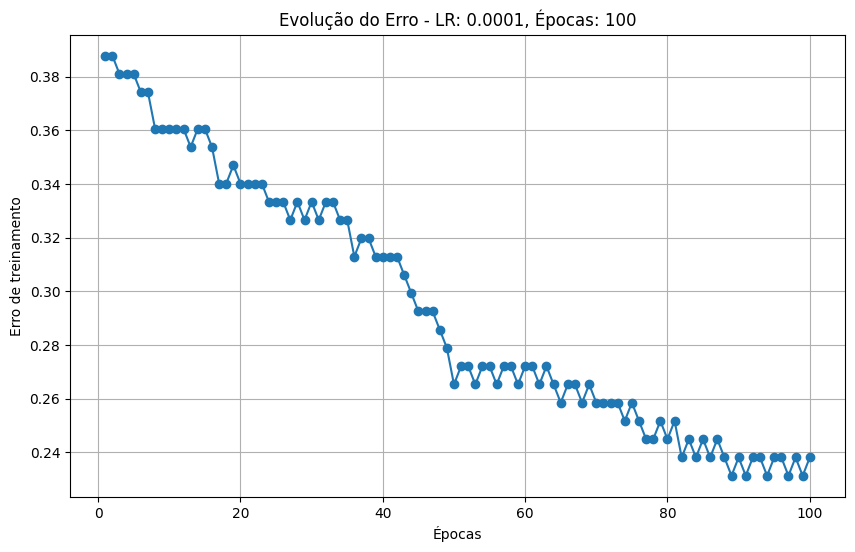

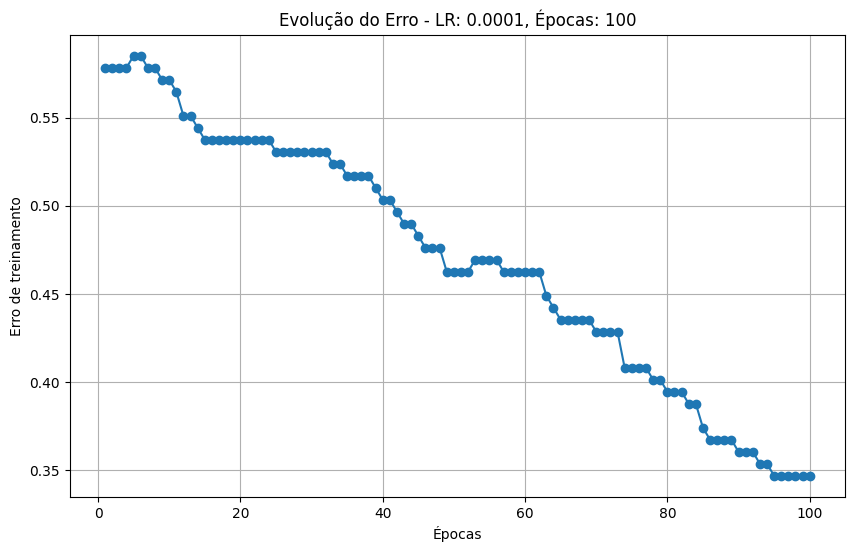

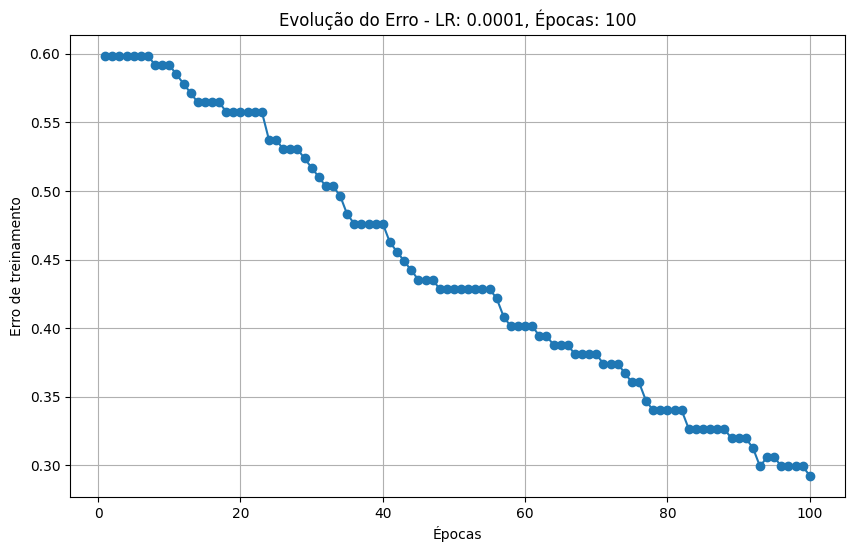

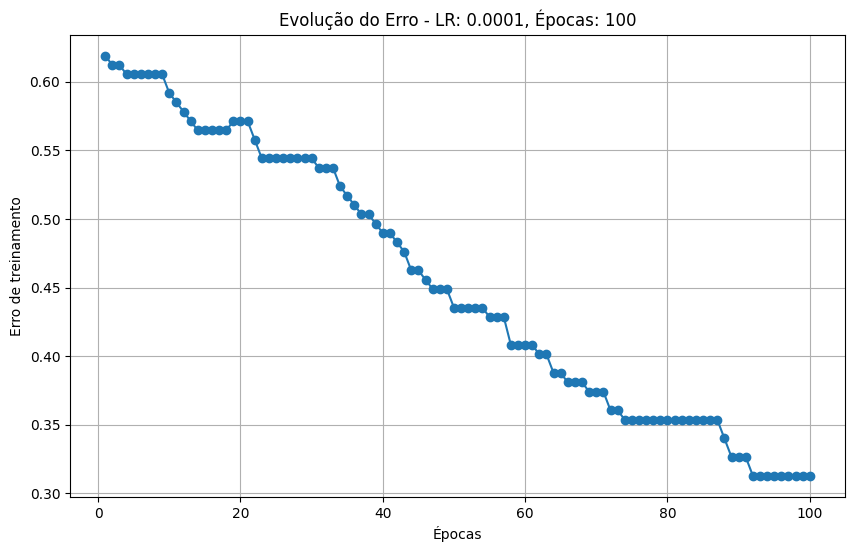

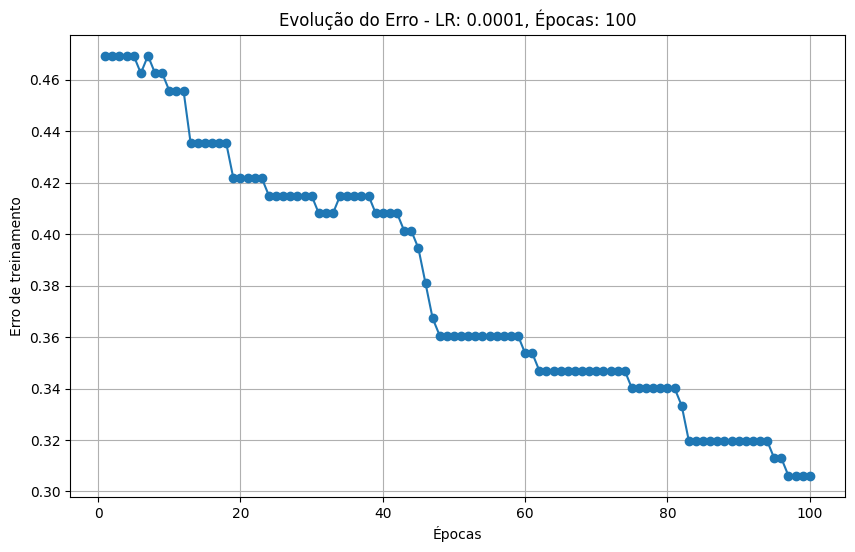

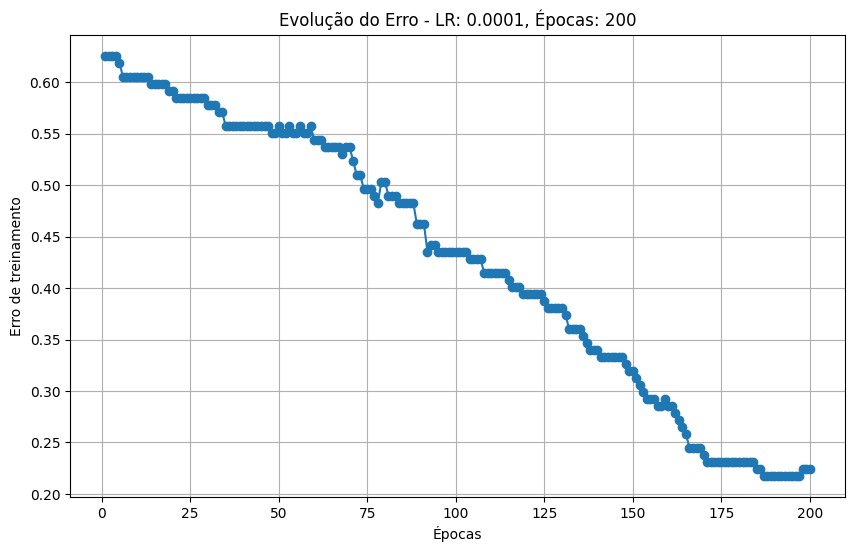

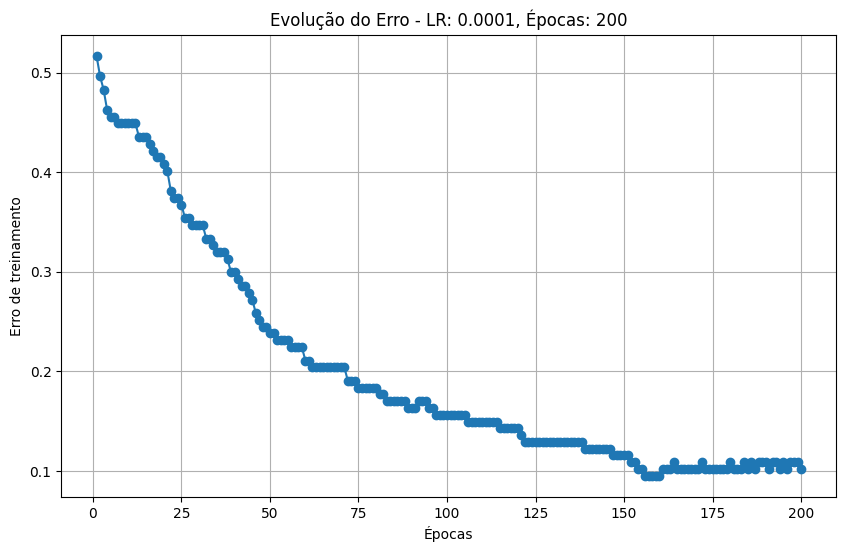

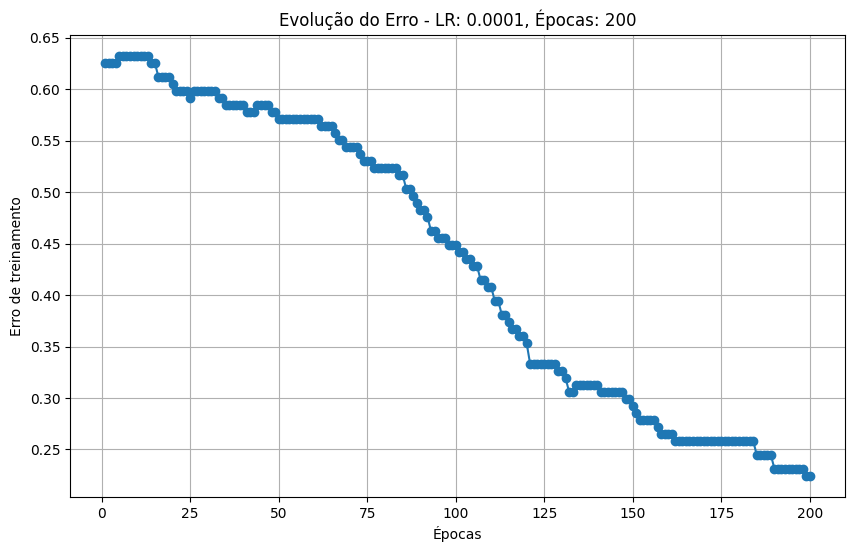

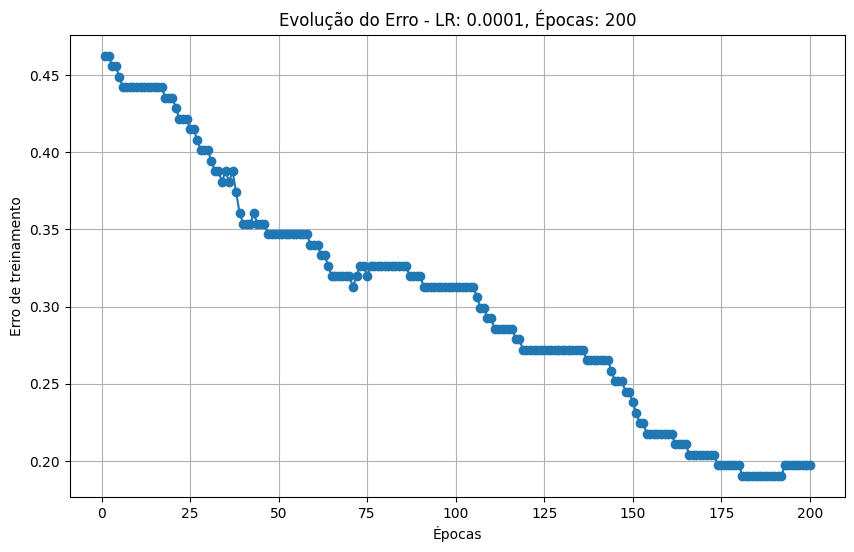

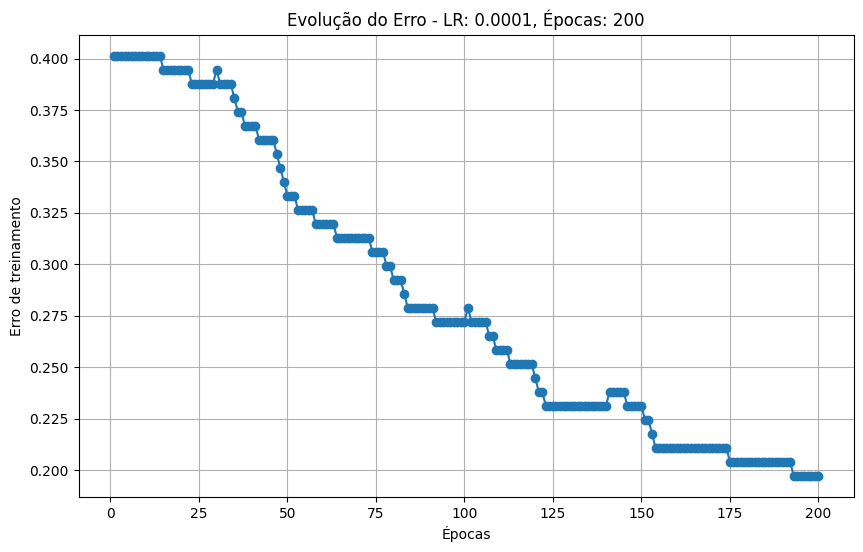

Taxa de aprendizado: 0.1, Épocas: 100
Acurácia Média (Treino): 0.9156 ± 0.0140
Acurácia Média (Teste): 0.8127 ± 0.0185

Taxa de aprendizado: 0.1, Épocas: 200
Acurácia Média (Treino): 0.9265 ± 0.0051
Acurácia Média (Teste): 0.8508 ± 0.0277

Taxa de aprendizado: 0.001, Épocas: 100
Acurácia Média (Treino): 0.9442 ± 0.0067
Acurácia Média (Teste): 0.8381 ± 0.0119

Taxa de aprendizado: 0.001, Épocas: 200
Acurácia Média (Treino): 0.9306 ± 0.0190
Acurácia Média (Teste): 0.8381 ± 0.0119

Taxa de aprendizado: 0.0001, Épocas: 100
Acurácia Média (Treino): 0.7020 ± 0.0379
Acurácia Média (Teste): 0.6730 ± 0.0591

Taxa de aprendizado: 0.0001, Épocas: 200
Acurácia Média (Treino): 0.8082 ± 0.0429
Acurácia Média (Teste): 0.6889 ± 0.0546



In [38]:
# Função para treinar um Perceptron
def train_perceptron(X, y, learning_rate=0.1, epochs=100, seed=None):
    """
    Treina um Perceptron para classificar dados binários.

    Args:
        X (np.array): Matriz de características de entrada (n_features x n_samples).
        y (np.array): Vetor de rótulos de saída (1 x n_samples).
        learning_rate (float): Taxa de aprendizado do Perceptron.
        epochs (int): Número máximo de épocas para treinamento.
        seed (int): Semente para geração de números aleatórios para reprodutibilidade.

    Returns:
        tuple: Pesos do Perceptron, número de épocas usadas e lista de erros por época.
    """
    if seed:
        np.random.seed(seed)  # Define a semente para reprodutibilidade

    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])  # Adiciona o bias (1) como uma característica

    weights = np.random.randn(n_features + 1)  # Inicializa pesos aleatórios, incluindo o bias

    errors = []  # Lista para armazenar o erro em cada época

    for epoch in range(epochs):
        error_count = 0  # Contador de erros na época atual

        for i in range(n_samples):
            x_i = X[:, i]  # Obtém a amostra i
            y_i = y[0, i]  # Obtém o rótulo correspondente

            # Calcula a predição do Perceptron
            y_pred = np.where(np.dot(weights, x_i) >= 0, 1, -1)

            # Atualiza os pesos se a predição estiver incorreta
            if y_pred != y_i:
                error_count += 1
                weights += learning_rate * (y_i - y_pred) * x_i

        # Armazena a taxa de erro da época atual
        errors.append(error_count / n_samples)

        # Se não houver erros, interrompe o treinamento
        if error_count == 0:
            break

    return weights, epoch + 1, errors


# Função para testar o Perceptron
def test_perceptron(X, y, weights):
    """
    Testa a acurácia do Perceptron usando os pesos treinados.

    Args:
        X (np.array): Matriz de características de entrada (n_features x n_samples).
        y (np.array): Vetor de rótulos de saída (1 x n_samples).
        weights (np.array): Pesos treinados do Perceptron.

    Returns:
        float: Acurácia do Perceptron.
    """
    n_features, n_samples = X.shape
    X = np.vstack([np.ones((1, n_samples)), X])  # Adiciona o bias

    # Calcula as predições
    predictions = np.where(np.dot(weights, X) >= 0, 1, -1)

    # Calcula a acurácia
    accuracy = np.mean(predictions == y)

    return accuracy


# Função para realizar múltiplos testes com variação de taxa de aprendizado e épocas
def run_experiments(X_train, y_train, X_test, y_test, learning_rates, epochs_list, repetitions=5):
    """
    Realiza múltiplos experimentos com diferentes taxas de aprendizado e número de épocas.

    Args:
        X_train (np.array): Dados de treinamento (características).
        y_train (np.array): Rótulos de treinamento.
        X_test (np.array): Dados de teste (características).
        y_test (np.array): Rótulos de teste.
        learning_rates (list): Lista de taxas de aprendizado a serem testadas.
        epochs_list (list): Lista de números de épocas a serem testadas.
        repetitions (int): Número de repetições para cada combinação de parâmetros.

    Returns:
        dict: Dicionário com os resultados dos experimentos (acurácia média e desvio padrão).
    """
    results = {}

    for lr in learning_rates:
        for epoch_count in epochs_list:
            accuracies_train = []
            accuracies_test = []

            for _ in range(repetitions):
                # Treina o Perceptron e obtém os pesos
                weights, _, errors = train_perceptron(X_train, y_train, learning_rate=lr, epochs=epoch_count)
                # Calcula a acurácia no conjunto de treinamento
                train_acc = test_perceptron(X_train, y_train, weights)
                # Calcula a acurácia no conjunto de teste
                test_acc = test_perceptron(X_test, y_test, weights)

                accuracies_train.append(train_acc)
                accuracies_test.append(test_acc)

                # Plotar o gráfico de erro por época
                plt.figure(figsize=(10, 6))
                plt.plot(range(1, len(errors) + 1), errors, marker='o')
                plt.title(f'Evolução do Erro - LR: {lr}, Épocas: {epoch_count}')
                plt.xlabel('Épocas')
                plt.ylabel('Erro de treinamento')
                plt.grid(True)
                plt.show()

            # Calcula a média e o desvio padrão das acurácias
            mean_train = np.mean(accuracies_train)
            std_train = np.std(accuracies_train)

            mean_test = np.mean(accuracies_test)
            std_test = np.std(accuracies_test)

            # Armazena os resultados no dicionário
            results[(lr, epoch_count)] = {
                'train_mean': mean_train,
                'train_std': std_train,
                'test_mean': mean_test,
                'test_std': std_test
            }

    return results


# Carregar os dados do Dataset #3
train_data = pd.read_csv('train_dataset3.csv')
test_data = pd.read_csv('test_dataset3.csv')

# Prepara os dados de treinamento e teste
X_train = train_data.drop('label', axis=1).values.T
y_train = train_data['label'].values.reshape(1, -1)

X_test = test_data.drop('label', axis=1).values.T
y_test = test_data['label'].values.reshape(1, -1)

# Define os parâmetros para os experimentos
learning_rates = [0.1, 0.001, 0.0001]
epochs_list = [100, 200]

# Executa os experimentos
results = run_experiments(X_train, y_train, X_test, y_test, learning_rates, epochs_list)

# Exibe os resultados
for params, metrics in results.items():
    lr, epochs = params
    print(f"Taxa de aprendizado: {lr}, Épocas: {epochs}")
    print(f"Acurácia Média (Treino): {metrics['train_mean']:.4f} ± {metrics['train_std']:.4f}")
    print(f"Acurácia Média (Teste): {metrics['test_mean']:.4f} ± {metrics['test_std']:.4f}\n")